In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from common.read_COMSOL_data import *

In [2]:
CURR_PATH = os.getcwd()
DATA_PATH = os.path.join(CURR_PATH, 'data')

# DW Simulation data

In [3]:
some_bias = -2
some_file_name = "20171022_lfo_dw_{}V_sim_data_3d_real.csv".format(some_bias)
some_file_path = os.path.join(DATA_PATH, some_file_name)
some_data = read_COMSOL_csv(some_file_path, name_list=['cdt', 'y21_imag', 'y21_real'])

# Domain Simulation data

In [4]:
single_domain_file_path = os.path.join(DATA_PATH, '20171022_lfo_sim_data_3d.csv')
single_domain_data = read_COMSOL_csv(single_domain_file_path, name_list=['tip_curv', 'cdt', 'freq', 'y21_imag', 'y21_real'])
tip_curv = 300
freq = 1e9
conditions= {'tip_curv': tip_curv, 'freq': freq}
single_domain_data_selected = get_sub_dataframe(single_domain_data, conditions=conditions)

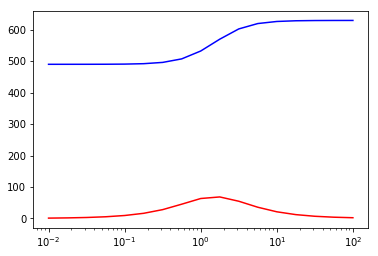

In [5]:
cdt_sd = single_domain_data_selected['cdt'].values
imag_sd = -1 * single_domain_data_selected['y21_imag'].values
real_sd = -1 * single_domain_data_selected['y21_real'].values

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(cdt_sd, imag_sd, 'b-', cdt_sd, real_sd, 'r-')
plt.xscale('log')

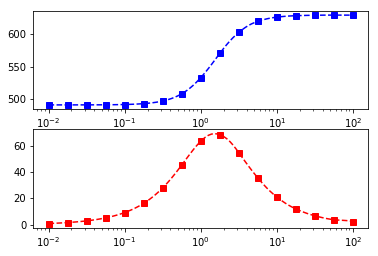

In [6]:
from scipy.interpolate import InterpolatedUnivariateSpline
curve_imag_sd = InterpolatedUnivariateSpline(cdt_sd, imag_sd)
curve_real_sd = InterpolatedUnivariateSpline(cdt_sd, real_sd)
xs = numpy.logspace(-2, 2, 100)

plt.subplot(2, 1, 1)
plt.plot(xs, curve_imag_sd(xs), 'b--')
plt.plot(cdt_sd, imag_sd, 'bs')
plt.xscale('log')

plt.subplot(2, 1, 2)
plt.plot(xs, curve_real_sd(xs), 'r--')
plt.plot(cdt_sd, real_sd, 'rs')
plt.xscale('log')

# D1 D2 cdt result

In [7]:
d1d2_file_path = os.path.join(DATA_PATH, '20171022_d1d2_cdt_vs_bias_result_real.csv')
import pandas as pd
d1d2_data = pd.read_csv(d1d2_file_path)
d1d2_data = d1d2_data.set_index('bias')

In [8]:
some_cdt1 = d1d2_data.loc[some_bias, 'cdt1']
some_cdt2 = d1d2_data.loc[some_bias, 'cdt2']

In [9]:
some_d1_real = curve_real_sd(some_cdt1)
some_d2_real = curve_real_sd(some_cdt2)

In [10]:
cdt = some_data['cdt'].values
diff_dw_d1_real = -1 * some_data['y21_real'].values - some_d1_real
diff_dw_d2_real = -1 * some_data['y21_real'].values - some_d2_real

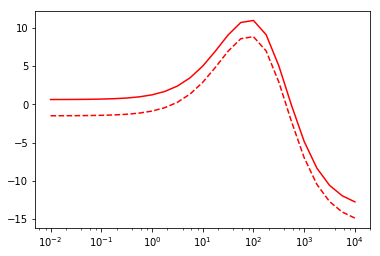

In [11]:
plt.plot(cdt, diff_dw_d1_real, 'r-')
plt.plot(cdt, diff_dw_d2_real, 'r--')
plt.xscale('log')

# Experiment data

In [12]:
exp_data_path = os.path.join(DATA_PATH, '20171022_dw_real.csv')
exp_data = pd.read_csv(exp_data_path, names = ['bias', 'dw', 'd1', 'd2', 'dw-d1', 'dw-d2'])


In [13]:
exp_data = exp_data.set_index('bias')

In [14]:
exp_1 = exp_data.loc[some_bias, 'dw-d1']
exp_2 = exp_data.loc[some_bias, 'dw-d2']

In [15]:
exp_1, exp_2

(12.82, 2.0499999999999998)

In [16]:
delta_1 = exp_1 / 4.4
delta_2 = exp_2 / 4.4

In [17]:
from common.data_analysis import from_y_to_x
dw_cdt_1 = from_y_to_x(cdt, diff_dw_d1_real, delta_1, 500)
dw_cdt_2 = from_y_to_x(cdt, diff_dw_d2_real, delta_2, 500)

In [18]:
dw_cdt_1, dw_cdt_2

(402.549151897797, 417.29370289336151)